Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Lastly, hit **Validate**.

If you worked locally, and then uploaded your work to the hub, make sure to follow these steps:
- open your uploaded notebook **on the hub**
- hit the validate button right above this cell, from inside the notebook

These  steps should solve any issue related to submitting the notebook on the hub.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

# Lab 8: Modeling and Estimation

** If you are not attending lab, this assignment is due 03/12/2018 at 11:59pm (graded on accuracy) **

In this lab we will work through the process of:
1. implementing a basic model, defining loss functions, 
1. minimizing loss functions using numeric libraries, and 
1. finally bootstrap sampling to understand the variability in the parameter estimates.

This lab will continue using the toy tip calculation dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Loading the Tips Dataset

To begin with, we load the tips dataset from the `seaborn` library.  The tips data contains records of tips, total bill, and information about the person who paid the bill.

In [3]:
data = sns.load_dataset("tips")

print("Number of Records:", len(data))
data.head()

Number of Records: 244


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---
<br></br>

# Question 1: Defining the Model 

In lecture we modeled the percent tip.  In this lab we will instead attempt to model the tip value (in dollars) as a function of the total bill.  As a consequence we define the following mathematical model:

$$\Large
\texttt{Tip} = \theta^*  \times \texttt{TotalBill}
$$

This follows the similar intuition that tips are some **unknown** percentage of the total bill.  We will then try to estimate the slope of this relationship which corresponds to the percent tip.

Here the parameter $\theta^*$ represents the true percent tip that we would like to estimate.  

**Implement the python function for this model (yes this is very easy):**


In [4]:
def model(theta, total_bill):
    """
    Takes the parameter theta and the total bill returns the computed tip.
    """
    ...
    return theta*total_bill

In [5]:
assert model(1.0, 2.0) == 2.0
assert np.all(model(3.0, np.array([4.0, 5.0])) == 3.0 * np.array([4.0, 5.0]))

---
<br/><br/><br/>

# Loss Functions

In class we covered a range of different loss functions.  In this lab we will implement the squared loss and the absolute loss functions.  
Suppose for a given total bill $x$ we observe a tip value of $y$ and our model predicts:
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
\hat{\hspace{0pt}y} = \theta * x
$$ 
then any of the following might be appropriate **loss functions**

1. **Squared Loss** (also known as the $L^2$ loss pronounced "ell-two"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$
1. **Absolute Loss** (also known as the $L^1$ loss pronounced "ell-one"):
$$\Large
% the \hspace{0pt} is added to address a bug in safari mathjax
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

---
<br></br>
In this question, you are going to define functions for **squared loss** and **absolute loss**. 

## Question 2a: Implement the squared loss function


$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left( y - \hat{\hspace{0pt}y} \right)^2
$$

In [6]:
def squared_loss(y_obs, y_hat):
    """
    y_obs: an array of observed valued
    y_hat: an array of predicted values
    return an array corresponding to the loss for each prediction
    """
    return (y_obs-y_hat)**2
    

In [7]:
assert squared_loss(2, 1) == 1
assert squared_loss(2, 0) == 4 
assert squared_loss(5, 1) == 16
assert np.sum((squared_loss(np.array([5, 6]), np.array([1, 1])) - np.array([16, 25]))**2) == 0.0

## Question 2b: Plotting Squared Loss

Suppose you observe $y=3.00$ and $x=28.00$ using the `model` and `squared_loss` function defined above plot the loss for a range of $\theta$ values:

In [8]:
y = np.array([3.00])
x = np.array([28.00])
thetas = np.linspace(0, 0.3, 200) # A range of theta values:

In [9]:
## Finish this by replacing 0.0 with the correct calculation 
## Hint 1: You will use squared_loss y, model, theta and x
## Hint 2: You might need to extract a single value from an array (or take the mean)
loss = np.array([ 0.0 for theta in thetas])

for i in range(len(loss)):
    loss[i] = np.mean(squared_loss(y,model(thetas[i],x)))

In [10]:
assert loss.dtype == np.dtype('float64') 

The following should produce this picture:

![squared_loss](squared_loss.png)

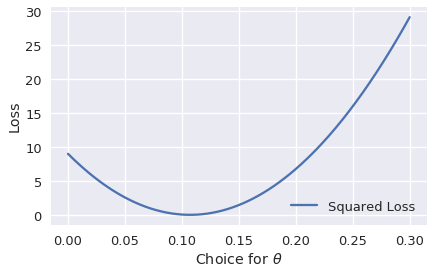

In [11]:
plt.plot(thetas, loss, label="Squared Loss")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("squared_loss_my_plot.png",  bbox_inches = 'tight')

## Question 2c: Implement the absolute loss 

$$\Large
L\left(y, \hat{\hspace{0pt}y} \right) = \left| y - \hat{\hspace{0pt}y} \right|
$$

In [12]:
def abs_loss(y_obs, y_hat):
    """
    y_obs: an array of observed valued
    y_hat: an array of predicted values
    return an array corresponding to the loss for each prediction
    """
    return abs(y_obs-y_hat)

In [13]:
assert abs_loss(2, 1) == 1
assert abs_loss(-2, 1) == 3
assert abs_loss(1, -3) == 4 
assert np.linalg.norm(abs_loss(np.array([1,2]), np.array([-3,3])) - np.array([4, 1]), ord=1) == 0.0

Below is the plot of the absolute loss.  If you implemented things correctly it should look like:

![absolute loss](absolute_loss.png)


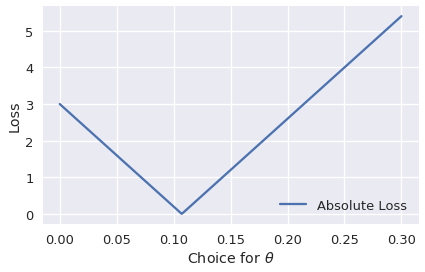

In [14]:
y = np.array([3.00])
x = np.array([28.00])
thetas = np.linspace(0, 0.3, 200) 

# Code provided for you this time. (your welcome)
loss = np.array([abs_loss(y, model(theta,x)).mean() for theta in thetas])

plt.plot(thetas, loss, label="Absolute Loss")
plt.xlabel(r"Choice for $\theta$")
plt.ylabel(r"Loss")
plt.legend(loc=4)
plt.savefig("absolute_loss_my_plot.png",  bbox_inches = 'tight')


## Question 2d: Plotting **Average Loss** for our Data

We can extend the above loss functions to an entire dataset by taking the average. Let the dataset $\mathcal{D}$ be the set of observations:

$$\Large
\mathcal{D} = \{(x_1, y_1), \ldots, (x_n, y_n)\}
$$

where $x_i$ is the total bill and $y_i$ is the tip dollar amount.

We can define the average loss over the dataset as:

$$\Large
L\left(\theta, \mathcal{D}\right) = \frac{1}{n} \sum_{i=1}^n L(m_\theta(x_i), y_i) = \frac{1}{n} \sum_{i=1}^n L(\theta *  x_i, y_i)
$$

where $m_\theta(x_i) = \theta * x_i$ is the model evaluated using the parameters $\theta$ on the bill amount $x_i$.

**Complete the following code block to render a plot of the average absolute and squared loss for different values of $\theta$**

In [15]:
thetas = np.linspace(0, 0.3, 200) # A range of theta values:
y = data['tip']
x = data['total_bill']

# Replace 0.0 with the correct value computed 
# using the model and loss functions from above
avg_squared_loss = np.array([0.0 for theta in thetas])
avg_absolute_loss = np.array([0.0 for theta in thetas])

i = 0
for theta in thetas:
    avg_absolute_loss[i] = np.average([abs_loss(y, model(theta,x))])
    avg_squared_loss[i] = np.average([squared_loss(y, model(theta,x))])
    i+=1

If done correctly the following plot should look like:

![Average Loss](average_loss.png)

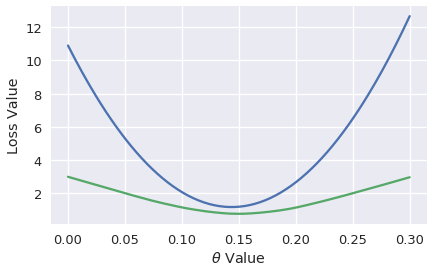

In [16]:
plt.plot(thetas, avg_squared_loss, label = "Average Squared Loss")
plt.plot(thetas, avg_absolute_loss, label = "Average Absolute Loss")
plt.xlabel(r"$\theta$ Value")
plt.ylabel("Loss Value")
plt.savefig("average_loss_my_plot.png",  bbox_inches = 'tight')

---
<br/><br/><br/> 

# Question 3: Minimizing The Loss

In some cases, it is possible to use calculus to analytically compute the parameters $\theta$ that minimize the loss function.  However, in this lab we will use computational techniques to minimize the loss.  Here we will use the [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) routine to minimize the average loss.

Complete the following python function:

In [17]:
from scipy.optimize import minimize

def minimize_average_loss(loss_function, model, x, y):
    """
    loss_function: either the squared or absolute loss functions from above.
    model: the model (as defined above)
    x: the x values (total bills)
    y: the y values (tip amounts)
    return the estimate for theta as a scalar
    
    Note we will ignore failed convergence for this lab ... 
    """
    
    ## Notes on the following function call which you need to finish:
    # 
    # 0. the ... should be replaced with the average loss evaluated on 
    #       the data x, y using the model and appropriate loss function
    # 1. x0 is the initial value for THETA.  Yes, this is confusing
    #       but optimization people like x to be the thing they are 
    #       optimizing.
    # 2. We extract the 'x' entry in the dictionary which corresponds
    #       to the value of theta at the optimum
    # 3. The resulting theta is actually an array with a single element
    #       therefore we grab just that element with [0]
    return minimize(lambda theta: np.average([loss_function(y, model(theta,x))]), x0=0.0)['x'][0]



In [18]:
## Should be roughly 0.1437
y = data['tip']
x = data['total_bill']
minimize_average_loss(squared_loss, model, x, y)

0.14373189123158361

In [19]:
## Should be roughly 0.1496
y = data['tip']
x = data['total_bill']
minimize_average_loss(abs_loss, model, x, y)

0.14958862196250119

In [20]:
assert np.isclose(minimize_average_loss(squared_loss, model, data['total_bill'], data['tip']), 0.14373189229218733)
assert np.isclose(minimize_average_loss(abs_loss, model, data['total_bill'], data['tip']), 0.14958862353611219)

## Submission

Congrats! You are finished with this assignment. Please don't forget to submit by 11:59 pm!